![logo](https://eventos.galileo.edu/images/logo-noslogan.png)

### Postgrado en Analisis y Prediccion de Datos

# *Curso*: Ciencia de Datos en Python

![title](imagenproyecto.png)

### 1. Importación de los paquetes necesarios para el proyecto

In [160]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn


### 2. Carga DataSet Original y su slicing en “Entrenamiento” y “Validación”

In [161]:
# Carga de datos usando la función "Load" the NumPy

setOriginal = np.load('proyecto_training_data.npy')

In [162]:
setOriginal

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [163]:
# Dimension

setOriginal.ndim

2

In [164]:
# Shape del DataSet

setOriginal.shape

(1460, 6)

In [165]:
# Length del array

lentotal = len(setOriginal)

lentotal

1460

In [166]:
# Slicing Set Original en 80% Entrenamiento y 20% Validacion

entrenamiento, validacion = np.split(setOriginal,[int(len(setOriginal)*0.8)])

print(f'La longitud del set de entrenamiento es de: {len(entrenamiento)} equivalente al {(len(entrenamiento)/lentotal)*100}%\n')

print(f'La longitud del set de validacion es de: {len(validacion)} equivalente al {(len(validacion)/lentotal)*100}%')

La longitud del set de entrenamiento es de: 1168 equivalente al 80.0%

La longitud del set de validacion es de: 292 equivalente al 20.0%


### 3. Análisis exploratorio de datos

In [167]:
media = np.mean(setOriginal, axis=0)
media

array([1.80921196e+05, 6.09931507e+00, 1.16262671e+03, 6.51780822e+00,
       1.97126781e+03,            nan])

In [168]:
x = setOriginal[~np.isnan(setOriginal)]

In [169]:
x

array([2.085e+05, 7.000e+00, 8.560e+02, ..., 6.000e+00, 1.965e+03,
       7.500e+01])

In [170]:
media = np.mean(x, axis=0)
media

31622.512998470767

In [171]:
df = pd.DataFrame(entrenamiento, columns=['A','B','C','D','E','F'])
df.head()
media = df.mean(axis=0)
media

A    180590.277397
B         6.101027
C      1156.323630
D         6.485445
E      1971.451199
F        69.946985
dtype: float64

In [172]:
df.isnull().values.any()

True

In [173]:
df = df.dropna()
df.head()
media = df.mean(axis=0)
media

A    180994.246362
B         6.124740
C      1155.628898
D         6.498960
E      1970.666320
F        69.946985
dtype: float64

In [174]:
df.isnull().values.any()

False

In [175]:
# Valor máximo de cada variable

df.max(axis=0)


A    755000.0
B        10.0
C      3138.0
D        14.0
E      2010.0
F       313.0
dtype: float64

In [176]:
# Valor mínimo de cada variable

df.min(axis=0)

A    34900.0
B        1.0
C      334.0
D        2.0
E     1875.0
F       21.0
dtype: float64

In [177]:
# Rango de cada variable


In [178]:
# Desviación estándar de cada variable

df.std(axis=0)

A    83331.266887
B        1.418266
C      372.588472
D        1.618217
E       31.543008
F       23.478161
dtype: float64

In [179]:
df.to_csv("Dataset.csv")

PermissionError: [Errno 13] Permission denied: 'Dataset.csv'

In [180]:
def estadisticos(x):

    for column in df:

        print(f'Estadisticos de: {column}\n')
        print(f'La media es: {round(df[column].mean(),4)}')
        print(f'El valor maximo es: {df[column].max()}')
        print(f'El valor minimo es: {df[column].min()}')
        print(f'El rango es: {df[column].max()-df[column].min()}')
        print(f'La desviacion estandar es: {round(df[column].std(),4)}\n')
        print('---------------------------------------------------------')
    
estadisticos(df)
    

Estadisticos de: A

La media es: 180994.2464
El valor maximo es: 755000.0
El valor minimo es: 34900.0
El rango es: 720100.0
La desviacion estandar es: 83331.2669

---------------------------------------------------------
Estadisticos de: B

La media es: 6.1247
El valor maximo es: 10.0
El valor minimo es: 1.0
El rango es: 9.0
La desviacion estandar es: 1.4183

---------------------------------------------------------
Estadisticos de: C

La media es: 1155.6289
El valor maximo es: 3138.0
El valor minimo es: 334.0
El rango es: 2804.0
La desviacion estandar es: 372.5885

---------------------------------------------------------
Estadisticos de: D

La media es: 6.499
El valor maximo es: 14.0
El valor minimo es: 2.0
El rango es: 12.0
La desviacion estandar es: 1.6182

---------------------------------------------------------
Estadisticos de: E

La media es: 1970.6663
El valor maximo es: 2010.0
El valor minimo es: 1875.0
El rango es: 135.0
La desviacion estandar es: 31.543

-------------------

In [181]:
chart1 = df['A']

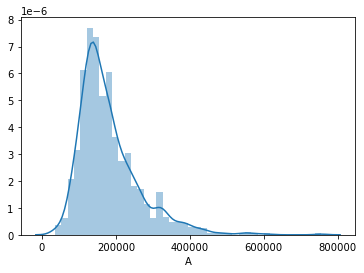

In [182]:
graph1 = sns.distplot(chart1)



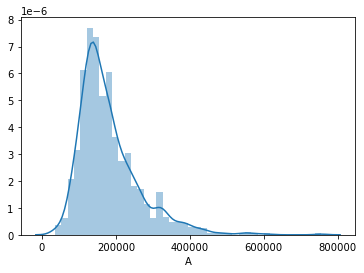

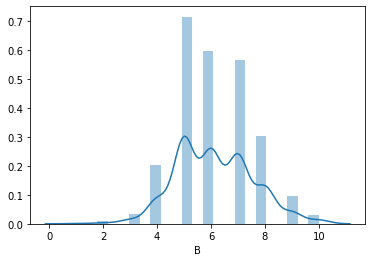

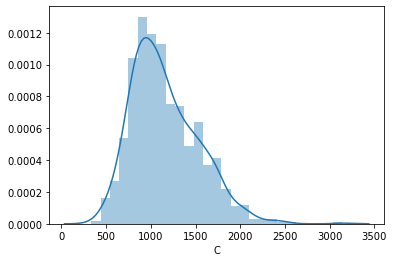

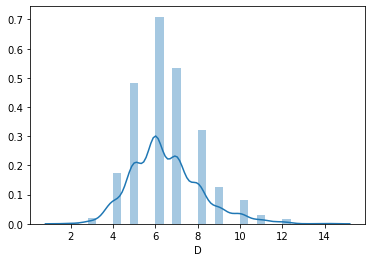

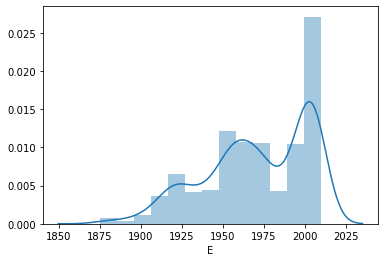

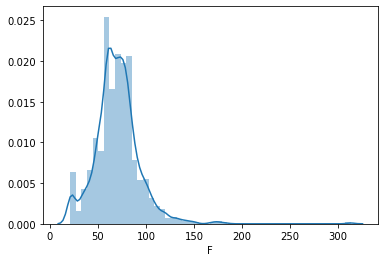

In [194]:
for i in df.columns:
    plt.pyplot.figure()
    sns.distplot(df[i])

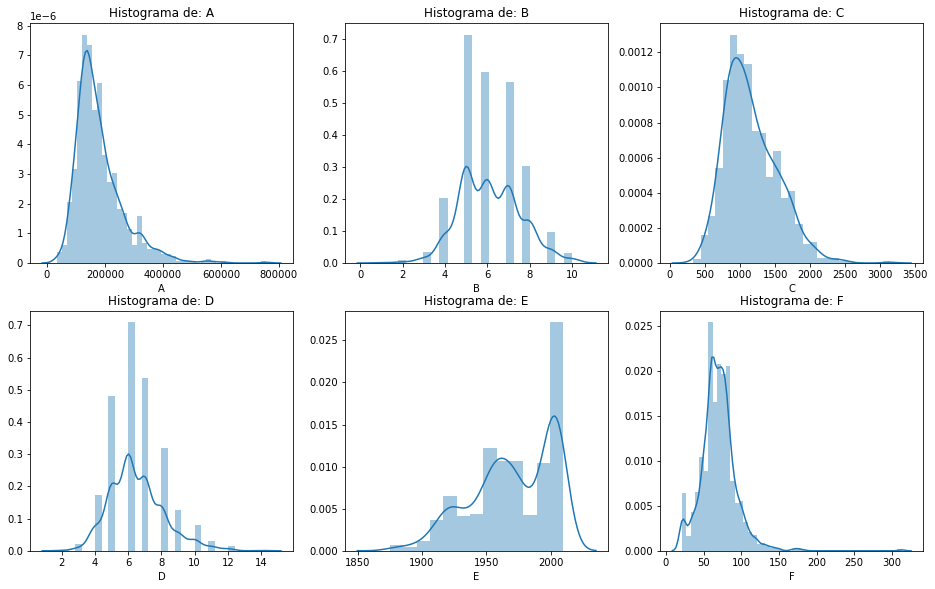

In [212]:

a = 3
b = 3
c = 1

fig = plt.pyplot.figure(figsize=(16,15))

for i in df:
    plt.pyplot.subplot(a,b,c)
    plt.pyplot.title(f'Histograma de: {i}')
    sns.distplot(df[i])
    c = c+1

plt.pyplot.show()